In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
imgs = pd.read_csv('../emnist-letters-train.csv', header=None)

imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
imgs.shape

(99040, 785)

In [37]:
imgs_no_blank = imgs[imgs[0] != -1]

imgs_unlabeled = imgs_no_blank.iloc[:, 1:].values

labels = imgs_no_blank.iloc[:, 0].values

imgs_unlabeled.shape

(88800, 784)

In [38]:
num_imgs = imgs_unlabeled.shape[0]
img_size = int(np.sqrt(imgs_unlabeled.shape[1]))  # Assuming square images

In [39]:
imgs_final = imgs_unlabeled.reshape(num_imgs, img_size, img_size)

imgs_final = np.array([np.rot90(np.flipud(img), k=3) for img in imgs_final])

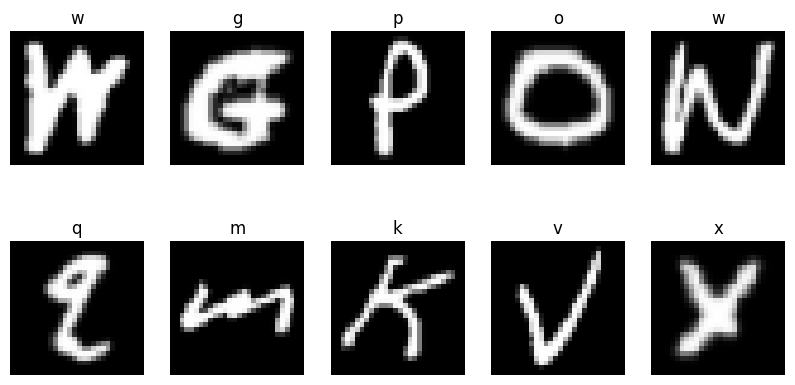

In [40]:
num_plot = 10
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < num_plot:
        ax.imshow(imgs_final[i], cmap='gray')
        ax.set_title(chr(labels[i] + 96))
        ax.axis('off')

plt.show()

In [41]:
class_images = {}
for label in np.unique(labels):
    class_images[label] = imgs_final[labels == label]

num_classes = len(class_images)

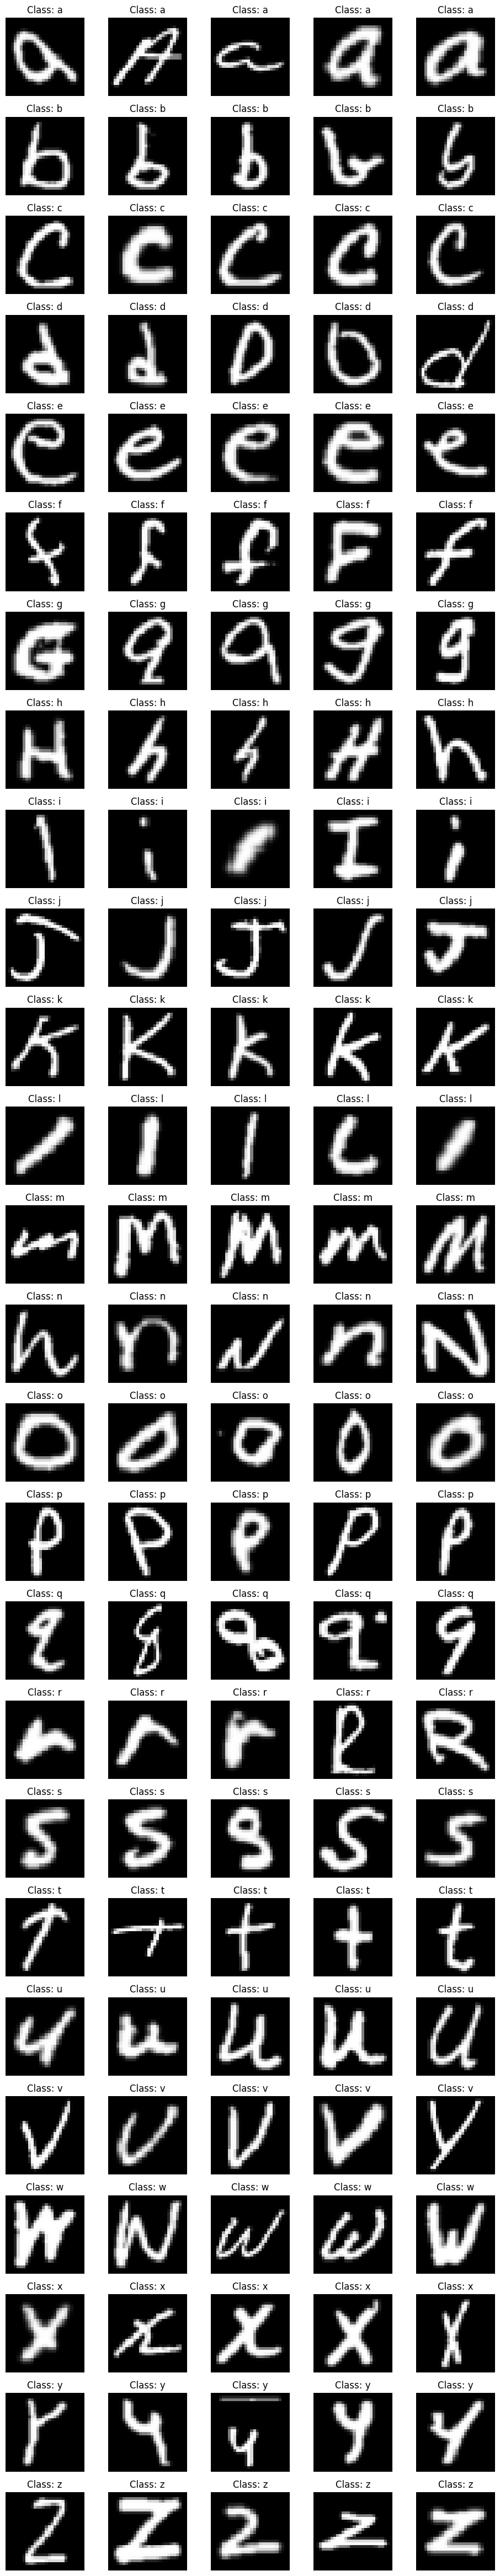

In [45]:
num_plot = 5

fig, axes = plt.subplots(num_classes, num_plot, figsize=(num_plot * 2, num_classes * 2))

for i, (label, imgs) in enumerate(class_images.items()):
    for j in range(num_plot):
        if j < len(imgs):
            axes[i, j].imshow(imgs[j], cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Class: {chr(label + 96)}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()